# Chapter 7: Data Cleaning and Preparation

## 7.1 Handling Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# "Sentinel" value (null).
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [3]:
# None is trated as Nan.
string_data = pd.Series(["hello", np.nan, None, "avocado"])
string_data

0      hello
1        NaN
2       None
3    avocado
dtype: object

In [4]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

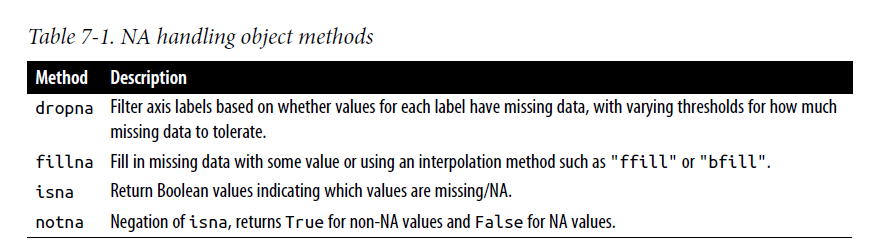

In [5]:
# Dropping na values.
string_data.dropna()

0      hello
3    avocado
dtype: object

In [6]:
string_data[string_data.notna()]

0      hello
3    avocado
dtype: object

In [7]:
# By default, .dropna() drops any row containing a missing value.
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan], [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

In [8]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [9]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [10]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [11]:
data[4] = np.nan

In [12]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
# Can also specify the threshold for at most a certain number of missing observations.
df = pd.DataFrame(np.random.standard_normal((7,3)))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

,0,1,2
0,-1.578857,NaN,NaN
1,0.415949,NaN,NaN
2,1.520184,NaN,-0.783230
3,-0.215685,NaN,1.728757
4,0.447684,0.192205,0.695192
5,-0.386463,-0.907766,0.802823
6,0.183616,-1.433939,-0.468239


In [15]:
df.dropna()

,0,1,2
4,0.447684,0.192205,0.695192
5,-0.386463,-0.907766,0.802823
6,0.183616,-1.433939,-0.468239


In [16]:
df.dropna(thresh=2)

,0,1,2
2,1.520184,NaN,-0.783230
3,-0.215685,NaN,1.728757
4,0.447684,0.192205,0.695192
5,-0.386463,-0.907766,0.802823
6,0.183616,-1.433939,-0.468239


In [17]:
# Filling in missing data.
df.fillna(0)

,0,1,2
0,-1.578857,0.000000,0.000000
1,0.415949,0.000000,0.000000
2,1.520184,0.000000,-0.783230
3,-0.215685,0.000000,1.728757
4,0.447684,0.192205,0.695192
5,-0.386463,-0.907766,0.802823
6,0.183616,-1.433939,-0.468239


In [18]:
# Calling fillna with a dictionary to use different fill value for each column.
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.578857,0.500000,0.000000
1,0.415949,0.500000,0.000000
2,1.520184,0.500000,-0.783230
3,-0.215685,0.500000,1.728757
4,0.447684,0.192205,0.695192
5,-0.386463,-0.907766,0.802823
6,0.183616,-1.433939,-0.468239


In [19]:
# Can also forward fill
df = pd.DataFrame(np.random.standard_normal((6,3)))
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-1.448222,0.746951,-0.622947
1,0.741392,0.215006,2.388227
2,0.492905,NaN,0.750583
3,-0.809233,NaN,-0.178080
4,-0.633297,NaN,NaN
5,-1.065030,NaN,NaN


In [20]:
df.ffill(limit=2)

,0,1,2
0,-1.448222,0.746951,-0.622947
1,0.741392,0.215006,2.388227
2,0.492905,0.215006,0.750583
3,-0.809233,0.215006,-0.178080
4,-0.633297,NaN,-0.178080
5,-1.065030,NaN,-0.178080


In [21]:
df = pd.DataFrame(np.random.standard_normal((7,3)))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

,0,1,2
0,0.170933,NaN,NaN
1,-0.657073,NaN,NaN
2,-0.227891,NaN,-0.263247
3,-1.307964,NaN,-0.396555
4,0.106833,1.070282,1.702493
5,-1.056830,0.332922,2.227105
6,1.054018,-0.485285,0.396102


In [22]:
df.bfill()

,0,1,2
0,0.170933,1.070282,-0.263247
1,-0.657073,1.070282,-0.263247
2,-0.227891,1.070282,-0.263247
3,-1.307964,1.070282,-0.396555
4,0.106833,1.070282,1.702493
5,-1.056830,0.332922,2.227105
6,1.054018,-0.485285,0.396102


In [23]:
df.bfill(limit=2)

,0,1,2
0,0.170933,NaN,-0.263247
1,-0.657073,NaN,-0.263247
2,-0.227891,1.070282,-0.263247
3,-1.307964,1.070282,-0.396555
4,0.106833,1.070282,1.702493
5,-1.056830,0.332922,2.227105
6,1.054018,-0.485285,0.396102


In [24]:
# Can also fill the missing values with mean, median etc.
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

### *Method* is depreciated now.
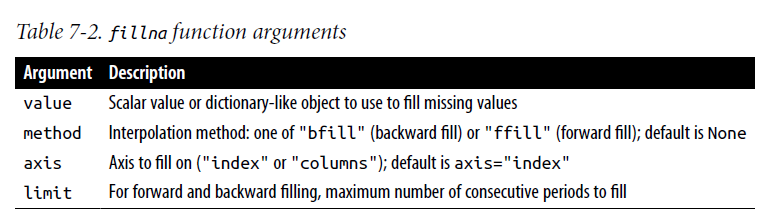

## 7.2 Data Transformation

### Filtering, cleaning, and other transofrmations are important operations as well.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

In [27]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [28]:
# Duplicate: its column values are exactly equal to those in an earlier row.
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [29]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [30]:
data["v1"] = range(7)

In [31]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


### Function or Mapping

In [32]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                     "pastrami", "corned beef", "bacon",
                     "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [33]:
meat_to_animal = {
"bacon": "pig",
"pulled pork": "pig",
"pastrami": "cow",
"corned beef": "cow",
"honey ham": "pig",
"nova lox": "salmon"
}

In [34]:
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [35]:
# Can also do the same thing with a function.
def get_animal(x):
    return meat_to_animal[x]

data["food"].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing values

In [36]:
data = pd.Series([1., -999, 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [37]:
# The -999 might be sentinel values for missing data. Replace with np.nan.
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [38]:
# Replace multiple values at once.
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [39]:
# Use a different replacement for each value, pass a list of substitutes.
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [40]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Discretization and binning

In [41]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)

In [42]:
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [43]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.031254,0.001488,0.009423,0.023578
std,0.970681,0.994499,0.982507,1.001016
min,-2.796607,-3.226509,-2.972996,-3.182002
25%,-0.603041,-0.695499,-0.645110,-0.706075
50%,0.043598,-0.016589,0.015849,-0.003794
75%,0.641229,0.679795,0.657253,0.721865
max,3.496767,3.333033,2.955391,3.043349


In [44]:
data

,0,1,2,3
0,0.505557,-1.629168,1.281172,2.783215
1,0.451619,-0.274316,1.421370,1.283772
2,-1.492743,-0.666861,0.178409,-1.602678
3,0.593454,0.101523,-1.728334,-0.222180
4,0.781093,0.275827,-0.761150,-0.100818
...,...,...,...,...
995,-0.584570,0.298292,1.573983,0.985113
996,0.807434,-0.666967,0.439888,-0.012595
997,-0.188041,1.459130,0.995991,0.776543
998,-1.874835,0.305466,0.737984,0.007071


In [45]:
# Find some outliers. Let's say values greater than abs(3).
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
204,3.496767,-1.856420,-0.550555,-1.728579
366,-0.086900,3.243887,0.200378,0.692237
427,-0.515003,-3.226509,1.380063,0.810028
711,-0.088357,0.728546,0.617705,-3.182002
849,0.188742,0.913987,-1.764396,3.043349
865,0.499249,3.333033,-1.023850,0.538597
879,3.060626,1.320386,0.879681,-3.127456
977,-0.161455,3.181148,-1.554423,-1.477078


In [46]:
# we can use the sign to produce 1 or -1 values based on whether the values in data are positive or negative.
np.sign(data).head()

,0,1,2,3
0,1.0,-1.0,1.0,1.0
1,1.0,-1.0,1.0,1.0
2,-1.0,-1.0,1.0,-1.0
3,1.0,1.0,-1.0,-1.0
4,1.0,1.0,-1.0,-1.0


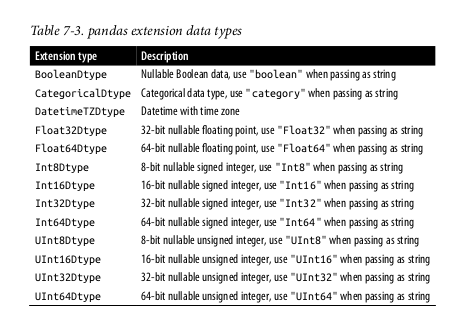

### 7.4 String Manipulation

In [47]:
val = "a,b,   guido"
val.split(",")

['a', 'b', '   guido']

In [48]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [49]:
"::".join(pieces)

'a::b::guido'

In [50]:
val.index(",")

1

In [51]:
val.index(":")

ValueError: substring not found

In [52]:
val.find(",")

1

In [53]:
val.find(":")

-1

In [54]:
val.count(",")

2

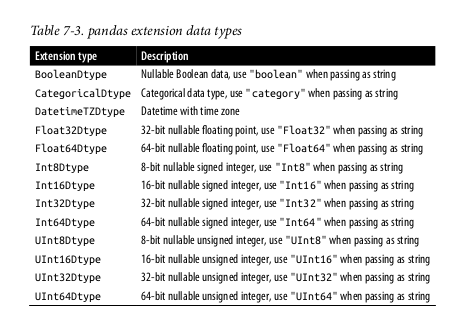

In [55]:
val.replace(",","::")

'a::b::   guido'

In [56]:
val.replace(",","")

'ab   guido'

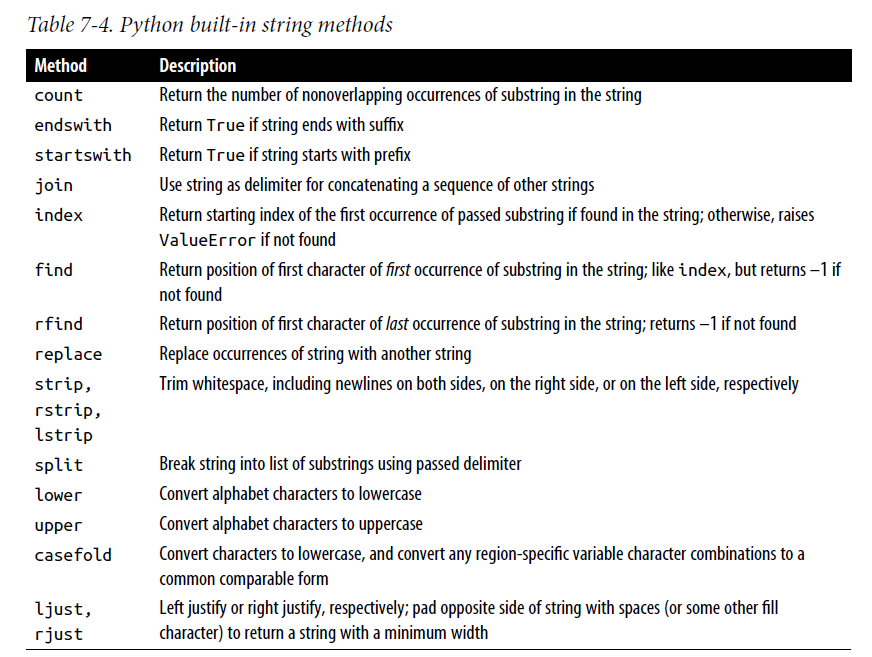

### Regex

In [57]:
import re

In [58]:
text = "foo bar\t baz \tqux"

In [59]:
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

### Regex is first compiled then it'll apply the split function. If reusing split often then probably best to compile first. Saves CPU cycles :)

In [60]:
regex = re.compile(r"\s+")
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [61]:
# We can also find all matching patterns to the regex.
regex.findall(text)

[' ', '\t ', ' \t']

In [62]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

In [63]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [64]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

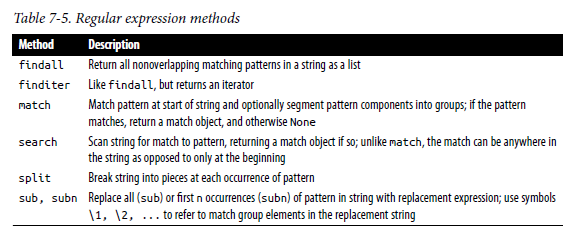

### String Functions in Pandas

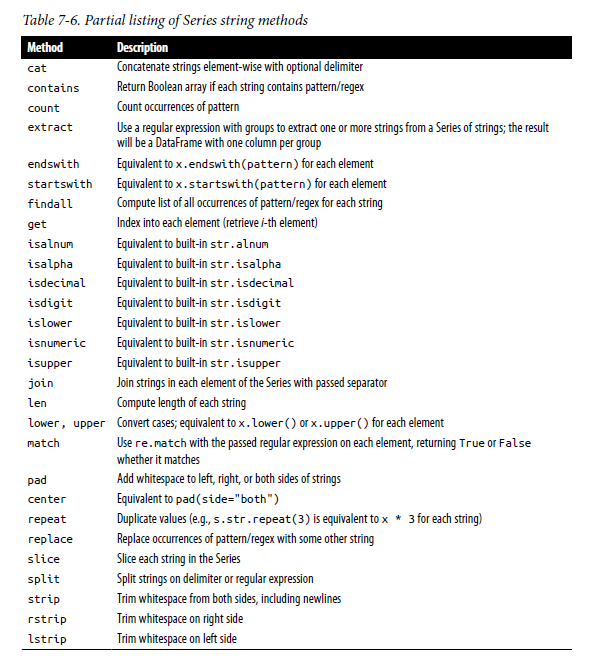

### 7.5 Categorical Data

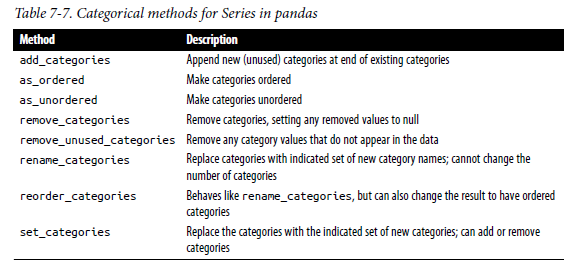